### ML-Lecture-2 Home-Work

### As a part of HW, I will be adding 
#### 1. Rescaling the features
#### 2. Adding XGBoost

# 1. Import Libraries

In [209]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# 2. Load dataset

In [210]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)

# shape
print("Shape: ",dataset.shape,"\n")

# head
print("First records of data:\n ",dataset.head(),"\n")

# class distribution
print(dataset.groupby('class').size())

Shape:  (150, 5) 

First records of data:
     sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa 

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


# 3. Descriptions

In [211]:
print("Statistical description of data:\n",dataset.describe())

Statistical description of data:
        sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


# 4. Box and Whisker plots

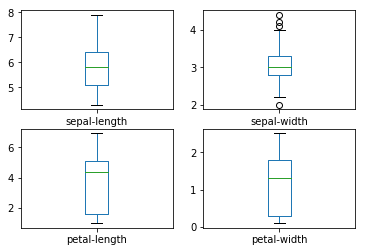

In [212]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

# 5. Histograms

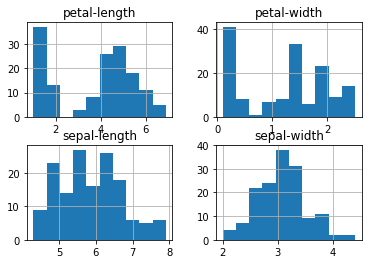

In [213]:
dataset.hist()
plt.show()

# 6. Scatter plot matrix

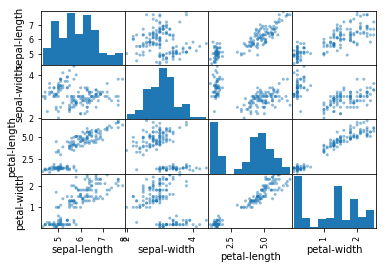

In [214]:
scatter_matrix(dataset)
plt.show()

# 7. Scaling
***

#### Standardization
The result of standardization (or Z-score normalization) is that the features will be rescaled so that they’ll have the properties of a standard normal distribution or Gaussian distribution with

                                μ=0 and σ=1
where μ is the mean (average) and σ is the standard deviation from the mean.

standard scores (also called z scores) of the samples are calculated as follows:
                        
                                z=(x−μ)/σ

#### Normalization (Min-Max Scaling)
***

Normalization often also simply called Min-Max scaling basically shrinks the range of the data such that the range is fixed between 0 and 1 (or -1 to 1 if there are negative values). 

It works better for cases in which the standardization might not work so well. If the distribution is not Gaussian or the standard deviation is very small, the min-max scaler works better.

## 7.1 Set Profile

In [306]:
# Apply Profile has following values
# 1. 0 - Default classroom profile
# 2. 1 - Default profile with Feature Engineering
# 3. 2 - Only XGBoost
# 4. 3 - XGBoost with Feature Engineering

#set it false if you want to see results without Min-Max Scaling
#Apply_Scaling = "true"
#set either min-max or standard
#Scaling_Type = "min-max"
#Do we want to encode Target Variable
#Encode_Target_Variable = "false"
#Do we want to enable prints
#Debug = "true"

Apply_Profile = 3

if Apply_Profile == 0:
    Apply_Scaling = "false"
    Scaling_Type = "" 
    Encode_Target_Variable = "false"
    Debug = "true"
elif Apply_Profile == 1:
    Apply_Scaling = "true"
    Scaling_Type = "min-max"
    Encode_Target_Variable = "false"
    Debug = "true"
elif Apply_Profile == 2:
    Apply_Scaling = "false"
    Scaling_Type = "" 
    Encode_Target_Variable = "true"
    Debug = "true"
elif Apply_Profile == 3:
    Apply_Scaling = "true"
    Scaling_Type = "min-max"
    Encode_Target_Variable = "true"
    Debug = "true"
else:
    print (" Wrong Choice !!!")

In [307]:
if Apply_Scaling == "true":
    if Scaling_Type == "min-max":
        X = preproc.minmax_scale(X)
    elif Scaling_Type == "standard":
        X = preproc.StandardScaler().fit_transform(X)
elif Apply_Scaling == "false":
    X = array[:,0:4]
    
Y = array[:,4]

if Debug == "true":
    print ("Using Scaling: %s \nType of Scaling: %s \nEncode Target Variable: %s" % (Apply_Scaling, Scaling_Type, Encode_Target_Variable))    

Using Scaling: true 
Type of Scaling: min-max 
Encode Target Variable: true


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64.
  warnings.warn(msg, DataConversionWarning)


# 8. Do we want to convert Target Variable from Object to integer

It is *NOT* required for sklearn provided models as library itself takes care of this. 

If it is required, we will use Label Encoding, Assuming no order of importance, which ignores domain knowledge.

In [308]:
if Encode_Target_Variable == "true":
    flowerGroup = np.unique(Y)
    print (flowerGroup)

    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    genre_labels = le.fit_transform(Y)
    Y = genre_labels
else:
    Y = Y

if Debug == "true":
    print (Y)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# 9. Split-out validation dataset

In [309]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(
    X, Y, test_size=validation_size, random_state=seed)

# Move to xgBoost if you have selected the same profile (Step-14)

# 10. Create Model Shells (Instantiate them)

In [254]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# 11. Spot test each model with Cross-Validation

In [255]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

results = []
names = []

# evaluate each model in turn
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(
        model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

LR: 0.875000 (0.067185)
LDA: 0.975000 (0.038188)
KNN: 0.975000 (0.038188)
CART: 0.966667 (0.040825)
RF: 0.983333 (0.033333)
NB: 0.975000 (0.053359)
SVM: 0.983333 (0.033333)


/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account

# 12. Graphical comparison of algorithms

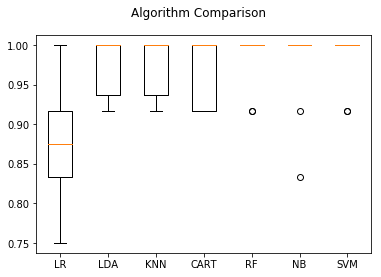

In [256]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# 13. Make predictions on validation dataset

##### 13.1 K-Nearest Neighbors:

In [257]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)

print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9333333333333333
[[ 7  0  0]
 [ 0 12  0]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.86      1.00      0.92        12
 Iris-virginica       1.00      0.82      0.90        11

      micro avg       0.93      0.93      0.93        30
      macro avg       0.95      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30



##### 13.2 SVM - Support Vector Machine:

In [258]:
svm = SVC()
svm.fit(X_train, Y_train)
predictions = svm.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8666666666666667
[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.83      0.83      0.83        12
 Iris-virginica       0.82      0.82      0.82        11

      micro avg       0.87      0.87      0.87        30
      macro avg       0.88      0.88      0.88        30
   weighted avg       0.87      0.87      0.87        30



/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#  14. Let's try XGBoost Model
***

### Ensure you have set correct profile at step - 7.1

### 14.1 Examine max_depth Parameter
***


In [310]:
#Examine default parameters for XGB Regresor
xgb.XGBRegressor()

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [311]:
# Create empty array to store results
results = []

# Create watchlist to keep track of train/validation performance
eval_set = [(X_train, Y_train), (X_validation, Y_validation)]

In [312]:
# Examine Max_Depth Parameter
# Enumerate through different max_depth values and store results
for max_depth in [2,3,4,5,10,12,15]:
    clf = xgb.XGBRegressor(max_depth=max_depth)
    clf.fit(X_train, Y_train, eval_set=eval_set, verbose=False)
    results.append(
        {
            'max_depth': max_depth,
            'train_error': metrics.mean_squared_error(Y_train, clf.predict(X_train)),
            'test_error': metrics.mean_squared_error(Y_validation, clf.predict(X_validation))
        })
    
# Display Results
max_depth_lr = pd.DataFrame(results).set_index('max_depth').sort_index()
max_depth_lr

,test_error,train_error
max_depth,,
2,0.091552,1.778146e-03
3,0.077509,5.207746e-05
4,0.093133,2.925846e-06
5,0.099543,3.562664e-07
10,0.102628,2.852582e-07
12,0.102628,2.852582e-07
15,0.102628,2.852582e-07


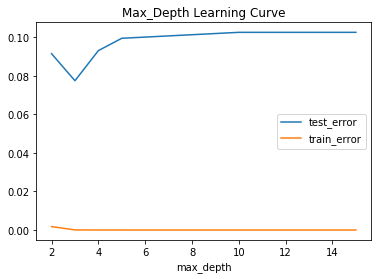

In [313]:
# Always look for test_error, seems best max_depth is 3 due to least test_error
# Plot Max_Depth Learning Curve
max_depth_lr.plot(title="Max_Depth Learning Curve")

### 14.2 Examine Learning_Rate Parameter
***


In [314]:
# Reset results array
results = []

for learning_rate in [0.05,0.1,0.2,0.4,0.6,0.8,1]:
    clf = xgb.XGBRegressor(max_depth=3,learning_rate=learning_rate)
    clf.fit(X_train, Y_train, eval_set=eval_set, verbose=False)
    results.append(
        {
            'learning_rate': learning_rate,
            'train_error': metrics.mean_squared_error(Y_train, clf.predict(X_train)),
            'test_error': metrics.mean_squared_error(Y_validation, clf.predict(X_validation))
        })
    
learning_rate_lr = pd.DataFrame(results).set_index('learning_rate').sort_index()
learning_rate_lr

,test_error,train_error
learning_rate,,
0.05,0.082089,0.001091
0.10,0.077509,0.000052
0.20,0.082229,0.000002
0.40,0.082043,0.000002
0.60,0.093462,0.000001
0.80,0.083121,0.000002
1.00,0.087414,0.000001


### 14.3 Plot Learning Rate Learning Curve
***

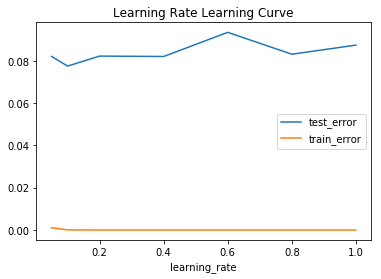

In [315]:
# Plot Learning Rate
learning_rate_lr.plot(title="Learning Rate Learning Curve")

In [316]:
#It seems best Learning Rate is 0.4

### 14.4 Explain N_Estimators Parameter

Explain n_estimators:
Gradient Boosting Trees are prone to overfit with many trees.

In [317]:
# Reset results array
# n_estimators: It controls the number of weak learners.
# learning_rate: Controls the contribution of weak learners in the final combination.
#               There is a trade-off between learning_rate and n_estimators.
# max_depth: maximum depth of the individual regression estimators. The maximum depth
#            limits the number of nodes in the tree. Tune this parameter for best 
#            performance; the best value depends on the interaction of the input variables.

results = []

for n_estimators in [50,60,100,150,200,500,750,1000, 1500]:
    clf = xgb.XGBRegressor(max_depth=3,learning_rate=0.40,n_estimators=n_estimators) # 200
    clf.fit(X_train, Y_train, eval_set=eval_set, verbose=False)
    results.append(
        {
            'n_estimators': n_estimators,
            'train_error': metrics.mean_squared_error(Y_train, clf.predict(X_train)),
            'test_error': metrics.mean_squared_error(Y_validation, clf.predict(X_validation))
        })
    
n_estimators_lr = pd.DataFrame(results).set_index('n_estimators').sort_index()
n_estimators_lr

,test_error,train_error
n_estimators,,
50,0.082043,0.000002
60,0.082043,0.000002
100,0.082043,0.000002
150,0.082043,0.000002
200,0.082043,0.000002
500,0.082043,0.000002
750,0.082043,0.000002
1000,0.082043,0.000002
1500,0.082043,0.000002


### 14.5 Plot N_Estimators Learning Curve
***
Best n_estimators seems to be 50

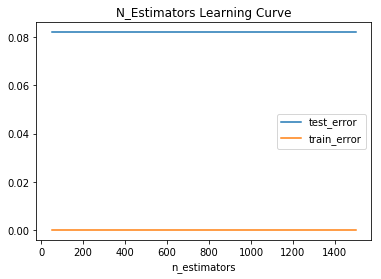

In [318]:
n_estimators_lr.plot(title="N_Estimators Learning Curve")

### 14.6 Perform GridSearchCV  (Grid search Cross Validation)

1. Use Grid Search to find optimal parameters
2. After getting the optimal parameters, you can plot learning curve to see what is the best early_stopping (n rounds)

**GridSearch:** In grid-search, we start by defining a dictionary of possible parameter values we want to test. All combinations will be evaluated.
    

In [319]:
model = xgb.XGBRegressor()

# Define Parameters
param_grid = {"max_depth": [2,3,10],
              "max_features" : [1.0,0.3,0.1],
              "min_samples_leaf" : [3,5,9],
              "n_estimators": [50,100,300],
              "learning_rate": [0.3,0.1,0.2,0.4]}

In [320]:
# Perform Grid Search CV
gs_cv = GridSearchCV(model, param_grid=param_grid, cv = 3, verbose=10, n_jobs=-1 ).fit(X_train, Y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0181s.) Setting batch_size=22.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 206 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 360 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 558 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 756 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 972 out of 972 | elapsed:    6.4s finished


In [321]:
# Best hyperparmeter setting
gs_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.4, max_delta_step=0,
       max_depth=2, max_features=1.0, min_child_weight=1,
       min_samples_leaf=3, missing=None, n_estimators=50, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

### 14.7 Plot Learning Curve

Let's use our best model parameters **above** from our GridSearchCV and plot our learning curve.

In [322]:
# Use our best model parameters found by GridSearchCV
best_model = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.4, max_delta_step=0,
       max_depth=2, max_features=1.0, min_child_weight=1,
       min_samples_leaf=3, missing=None, n_estimators=50, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

Text(0.5,1,'XGBoost RMSE')

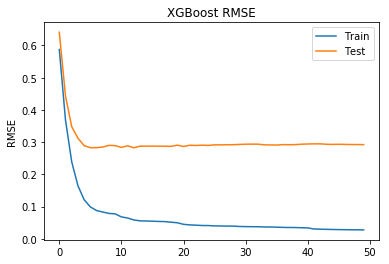

In [323]:
# Create eval_set
eval_set = [(X_train, Y_train), (X_validation, Y_validation)]

# Fit our model to the training set
best_model.fit(X_train, Y_train, eval_set=eval_set, verbose=False)

# Make predictions with test data
y_pred = best_model.predict(X_validation)
predictions = [round(value) for value in y_pred]

# Retrieve performance metrics
results = best_model.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

# Plot log loss curve
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()
plt.ylabel('RMSE')
plt.title('XGBoost RMSE')

### 14.8 Early Stopping

Looks like our model starts to overfit after about 11 rounds.

### Here's the solution

Add in **'early_stopping_rounds'** as a parameter and it will allow you to find the sweet spot before your model starts to overfit

**Performing Early Stopping**: 
- We found that **n_estimators=<?>** was the best parameter where we should stop training at.
- Early Stopping is used because it allows you to see at what point does your model start overfitting
- It saves you lots of time and processing power

In [324]:
# Fit the training set and apply early 
# stopping (early_stopping_round=10 is just an arbitarary number)

best_model.fit(X_train, Y_train, early_stopping_rounds=10, eval_set=eval_set, verbose=True)

[0]	validation_0-rmse:0.587493	validation_1-rmse:0.641096
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:0.368365	validation_1-rmse:0.442957
[2]	validation_0-rmse:0.238973	validation_1-rmse:0.348045
[3]	validation_0-rmse:0.164867	validation_1-rmse:0.312156
[4]	validation_0-rmse:0.121413	validation_1-rmse:0.289288
[5]	validation_0-rmse:0.099053	validation_1-rmse:0.282878
[6]	validation_0-rmse:0.087771	validation_1-rmse:0.282964
[7]	validation_0-rmse:0.083153	validation_1-rmse:0.284835
[8]	validation_0-rmse:0.078849	validation_1-rmse:0.290001
[9]	validation_0-rmse:0.077451	validation_1-rmse:0.28922
[10]	validation_0-rmse:0.068003	validation_1-rmse:0.283782
[11]	validation_0-rmse:0.064642	validation_1-rmse:0.28862
[12]	validation_0-rmse:0.058552	validation_1-rmse:0.28264
[13]	validation_0-rmse:0.05584	validation_1-rmse:0.287563
[14]	validation_0-rmse:0.0552

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.4, max_delta_step=0,
       max_depth=2, max_features=1.0, min_child_weight=1,
       min_samples_leaf=3, missing=None, n_estimators=50, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

### 14.9 Best Early Stopping Round: 12 (trees)

In [325]:
# Use our best model parameters found by GridSearchCV + n_estimators as 12 + Max_depth as 3
#(this was best value when calculated individually)
best_model = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.4, max_delta_step=0,
       max_depth=3, max_features=1.0, min_child_weight=1,
       min_samples_leaf=3, missing=None, n_estimators=12, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

0.9333333333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.83      0.91        12
           2       0.85      1.00      0.92        11

   micro avg       0.93      0.93      0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



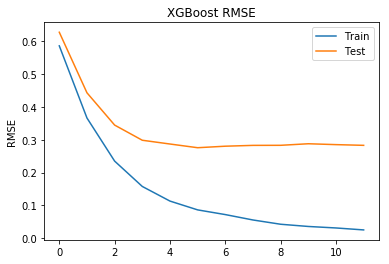

In [326]:
# Create eval_set
eval_set = [(X_train, Y_train), (X_validation, Y_validation)]

# Fit our model to the training set
best_model.fit(X_train, Y_train, eval_set=eval_set, verbose=False)

# Make predictions with test data
y_pred = best_model.predict(X_validation)
predictions = [round(value) for value in y_pred]

# Retrieve performance metrics
results = best_model.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

# Plot log loss curve
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()
plt.ylabel('RMSE')
plt.title('XGBoost RMSE')

print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))